## Análise exploratória dados fitbit

In [40]:
import pandas as pd
from pathlib import Path
import matplotlib as plt

In [ ]:
# facilitando acesso às pastas para ambas pessoas analisando os dados
caminho_arquivo = Path('dailyActivity_merged.csv').resolve().parents[1]
print('caminho do diretório',caminho_arquivo)

caminho do diretório D:\python\bellabeat-analysis


In [3]:
d_activity = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/dailyActivity_merged.csv')
heartrate = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/heartrate_seconds_merged.csv')
h_calories = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/hourlyCalories_merged.csv')
h_intensity = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/hourlyIntensities_merged.csv')
m_calories = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/minuteCaloriesNarrow_merged.csv')
m_intensity = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/minuteIntensitiesNarrow_merged.csv')
m_sleep = pd.read_csv(f'{caminho_arquivo}//database/fitbit-data/minuteSleep_merged.csv')
weightlog = pd.read_csv(f'{caminho_arquivo}/database/fitbit-data/weightLogInfo_merged_treated.csv')

### Análise de uso das features

####  Gráfico de uso por feature

In [ ]:
id_d_activity = d_activity['Id'].nunique()
id_h_calories = h_calories['Id'].nunique()
id_h_intensity = h_intensity['Id'].nunique()
id_m_calories = m_calories['Id'].nunique()
id_m_intensity = m_intensity['Id'].nunique()
id_m_sleep = m_sleep['Id'].nunique()
id_heartrate = heartrate['Id'].nunique()
id_weightlog = weightlog['Id'].nunique()

11

In [ ]:
ids = pd.Series({'d_activity': id_d_activity, 'calories': id_h_calories, 'exercise_ intensity': id_h_intensity , 'sleep':id_m_sleep ,  'heartrate': id_heartrate, 'weightlog': id_weightlog })

<Axes: >

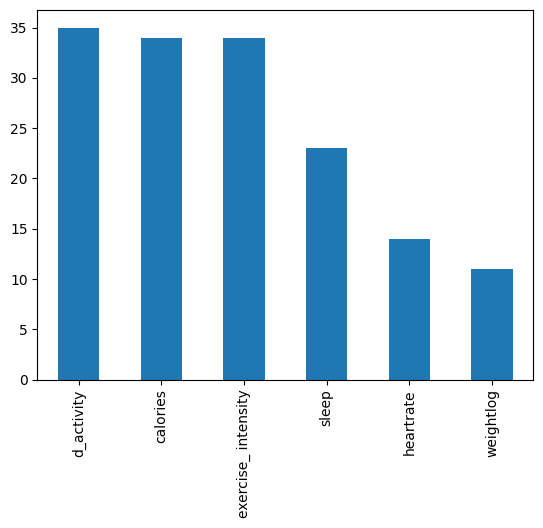

In [76]:
ids.plot.bar()

### análise de tipo de exercício (tempo)

In [119]:
fairly_active_minutes_per_id = d_activity.groupby('Id')['FairlyActiveMinutes'].aggregate('sum')
very_active_minutes_per_id = d_activity.groupby('Id')['VeryActiveMinutes'].aggregate('sum')
lightly_active_minutes_per_id = d_activity.groupby('Id')['LightlyActiveMinutes'].aggregate('sum')

fairly_active_minutes_sum = fairly_active_minutes_per_id.sum()
very_active_minutes_sum = very_active_minutes_per_id.sum()
lightly_active_minutes_sum = lightly_active_minutes_per_id.sum()



In [121]:
active_minutes_sum = pd.Series({'Lightly Active time': lightly_active_minutes_sum,'Fairly Active time': fairly_active_minutes_sum, 'Very Active time': very_active_minutes_sum })

<Axes: >

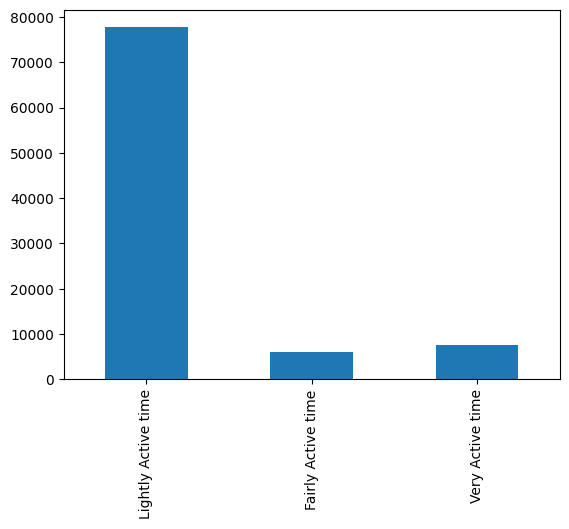

In [126]:
active_minutes_sum.plot.bar()

### Análise de tipo de exercício (distância)

In [131]:
fairly_active_distance_per_id = d_activity.groupby('Id')['ModeratelyActiveDistance'].aggregate('sum')
very_active_distance_per_id = d_activity.groupby('Id')['VeryActiveDistance'].aggregate('sum')
lightly_active_distance_per_id = d_activity.groupby('Id')['LightActiveDistance'].aggregate('sum')

fairly_active_distance_sum = fairly_active_distance_per_id.sum()
very_active_distance_sum = very_active_distance_per_id.sum()
lightly_active_distance_sum = lightly_active_distance_per_id.sum()

In [132]:
active_distance_sum = pd.Series({'Lightly Active distance': lightly_active_distance_sum,'Fairly Active distance': fairly_active_distance_sum, 'Very Active distance': very_active_distance_sum })

<Axes: >

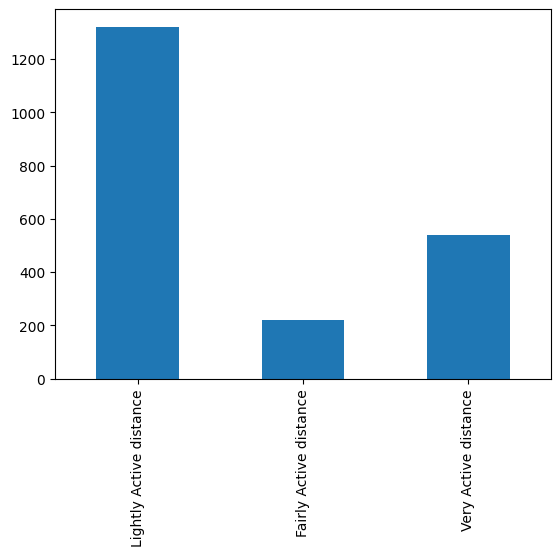

In [133]:
active_distance_sum.plot.bar()

### Checagem de timeframe dos dados e presença dos ids ao longo do tempo

In [7]:
pd.pivot_table(d_activity, index='ActivityDate', values= 'Id', aggfunc='count').sort_values(by='ActivityDate', ascending= True)
# primeiras duas semanas dos dados só tem 2 usuários ativos, outros usuários se tornam ativos ao longo dos dias restantes
# 15 usos do fitbit por id deve levar em conta essa distribuição
# primeiro dia do dataframe: 12 de março . último dia do data frame: 12 de abril


,Id
ActivityDate,
3/12/2016,2
3/13/2016,2
3/14/2016,2
3/15/2016,2
3/16/2016,2
3/17/2016,2
3/18/2016,2
3/19/2016,2
3/20/2016,2


### Análise exploratória d_activity


In [8]:
d_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [9]:
# Existe 457 registros, mas 35 Ids unicos, Sempre que a pessoa usa o app o registro é salvo novamente.
# Isso é uma suposição, então se for analisar quantidade de atividade fisica por pessoa, tem  que juntar os id.
# Se for analisar a quantidade de que pessoa usa o app, junta quantas vezes tal id aparece.
# Apenas um exemplo
duplicados = d_activity['Id'].duplicated().sum()
duplicados


np.int64(422)

In [10]:
# Mostrando Ids duplicados, Então, sempre que a pessoa usa o app grava o dia e a data da atividade.
# existe apenas 35 pessoas que usam o app. 
duplicados = d_activity.duplicated(subset='Id')
print(d_activity[duplicados])

             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
1    1503960366    3/26/2016       17609      11.550000        11.550000   
2    1503960366    3/27/2016       12736       8.530000         8.530000   
3    1503960366    3/28/2016       13231       8.930000         8.930000   
4    1503960366    3/29/2016       12041       7.850000         7.850000   
5    1503960366    3/30/2016       10970       7.160000         7.160000   
..          ...          ...         ...            ...              ...   
452  8877689391     4/8/2016       23014      20.389999        20.389999   
453  8877689391     4/9/2016       16470       8.070000         8.070000   
454  8877689391    4/10/2016       28497      27.530001        27.530001   
455  8877689391    4/11/2016       10622       8.060000         8.060000   
456  8877689391    4/12/2016        2350       1.780000         1.780000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
1       

In [11]:
# Quantas vezes os 35 id aparecem, para saber frequência do uso da feature d_activity
contagem_id = d_activity['Id'].value_counts()
contagem_id.sort_values()

Id
4388161847     8
8583815059     8
2891001357     8
6391747486     9
6775888955     9
3372868164    10
6290855005    10
1644430081    10
6117666160    10
8053475328    11
5577150313    11
4319703577    12
4558609924    12
3977333714    12
2320127002    12
2873212765    12
7007744171    12
8877689391    12
7086361926    12
8253242879    12
8378563200    12
1927972279    12
2022484408    12
5553957443    12
2026352035    12
1844505072    12
8792009665    12
6962181067    14
2347167796    15
4702921684    15
4445114986    15
1503960366    19
1624580081    19
4020332650    32
4057192912    32
Name: count, dtype: int64

### Análise Total steps

#### Estatística dos dados de passos

In [12]:
d_activity['TotalSteps'].median() #5986.0
d_activity['TotalSteps'].mean() #6546.5
d_activity['TotalSteps'].mode() #0  61 linhas desse dataframe não tem nenhuma entrada de exercício, ou passos. 
#396 entradas com input de passos

0    0
Name: TotalSteps, dtype: int64

#### Análise de passos max e mean por id

In [13]:
pd.pivot_table(d_activity, values = 'TotalSteps', index= 'Id', aggfunc= ('mean', 'max')).round(2)
#apenas uma pessoa não fez input de passos, média e máximo de passos parece sem erros

,max,mean
Id,,
1503960366,17609,11640.53
1624580081,18464,4226.26
1644430081,20237,9274.80
1844505072,6847,3640.58
1927972279,5662,2180.83
2022484408,18247,12174.92
2026352035,6679,3392.75
2320127002,11230,3138.42
2347167796,16081,9800.07


In [14]:
d_activity[d_activity['TotalSteps']== 0] #dados nulos? é possível entender que essas pessoas só usam o fitbit em dias de exercício?

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
51,1844505072,4/4/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,669,1347
52,1844505072,4/5/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
59,1844505072,4/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,426,399
96,2320127002,4/1/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1324
97,2320127002,4/2/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,8253242879,4/2/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1429
403,8253242879,4/3/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1429
404,8253242879,4/4/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1429
405,8253242879,4/5/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1429


In [15]:
# pesquisando entradas dos ids com steps nulos - 14 pessoas com dados nulos de passos - sabendo que apenas um desses Ids (4388161847) não tem nenhum input de passos
null_steps_ids = d_activity.loc[d_activity['TotalSteps']== 0, 'Id'].drop_duplicates()
null_steps_ids
# Pelo menos 1 vez ou mais esses ids não tiveram entrada de steps.

51     1844505072
96     2320127002
122    2347167796
134    2873212765
135    2891001357
197    4057192912
240    4319703577
241    4388161847
290    4702921684
316    6117666160
326    6290855005
334    6391747486
346    6775888955
401    8253242879
Name: Id, dtype: int64

### Insights sobre steps até aqui:
* 34 Ids tem input de passos, sem dados discrepantes.
* um Id não inputou passos nenhuma vez.
* 14 ids tem pelo menos 1 ou masi de um dia com 0 passos, como não é viável passar 1 dia sem dar passos, pode-se supor que são pessoas que não usam o fit bit em dias sem exercício (e nessa amostra, são minoria)

In [16]:
# existe 14 ids com steps zero, mas todas as suas colunas nao estão com zero, saber qual contéudo das colunas dos ids com steps zro
id_a_verificar = [
    1844505072, 2320127002, 2347167796, 2873212765, 2891001357,
    4057192912, 4319703577, 4388161847, 4702921684, 6117666160,
    6290855005, 6391747486, 6775888955, 8253242879
]
for ids in id_a_verificar:
    print(f"Verificando se o ID {ids}")
    colunas_id = d_activity[d_activity['Id'] == ids].drop('Id', axis=1)
    
    # Check if all values in all columns (except 'Id') are zero
    todas_zeros = (colunas_id == 0).all().all()
    print("todas as suas colunas tem valor zero", todas_zeros)

Verificando se o ID 1844505072
todas as suas colunas tem valor zero False
Verificando se o ID 2320127002
todas as suas colunas tem valor zero False
Verificando se o ID 2347167796
todas as suas colunas tem valor zero False
Verificando se o ID 2873212765
todas as suas colunas tem valor zero False
Verificando se o ID 2891001357
todas as suas colunas tem valor zero False
Verificando se o ID 4057192912
todas as suas colunas tem valor zero False
Verificando se o ID 4319703577
todas as suas colunas tem valor zero False
Verificando se o ID 4388161847
todas as suas colunas tem valor zero False
Verificando se o ID 4702921684
todas as suas colunas tem valor zero False
Verificando se o ID 6117666160
todas as suas colunas tem valor zero False
Verificando se o ID 6290855005
todas as suas colunas tem valor zero False
Verificando se o ID 6391747486
todas as suas colunas tem valor zero False
Verificando se o ID 6775888955
todas as suas colunas tem valor zero False
Verificando se o ID 8253242879
todas a

In [17]:
# Ver contéudo das colunas desse ID 1844505072
d_activity[d_activity['Id']== 1844505072]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
48,1844505072,4/1/2016,6847,4.53,4.53,0.0,0.61,0.37,3.55,0.0,9,9,251,1171,1969
49,1844505072,4/2/2016,5367,3.55,3.55,0.0,0.00,0.00,3.55,0.0,0,0,263,1177,1889
50,1844505072,4/3/2016,2841,1.88,1.88,0.0,0.00,0.00,1.88,0.0,0,0,136,1114,1636
51,1844505072,4/4/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,669,1347
52,1844505072,4/5/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1347
53,1844505072,4/6/2016,7,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,1,1439,1349
54,1844505072,4/7/2016,6344,4.19,4.19,0.0,0.00,0.00,4.19,0.0,0,0,290,1150,1965
55,1844505072,4/8/2016,5316,3.51,3.51,0.0,0.00,0.00,3.51,0.0,0,0,221,1219,1824
56,1844505072,4/9/2016,4979,3.29,3.29,0.0,0.00,0.00,3.29,0.0,0,0,184,620,1807
57,1844505072,4/10/2016,6556,4.34,4.34,0.0,0.00,0.00,4.33,0.0,0,0,305,810,1971


In [18]:
# Quantas vezes o step zero aparece 
df_filtrado = d_activity[d_activity['TotalSteps'] == 0]
len(df_filtrado['TotalSteps'])
# Existe 61 valores com zero, pois dos 14 ids que tem step zero, somando da 61 steps zero, pois alguns ficaram 1 ou mais dias sem dar passos.

61

### Acrescentando infomação na Análise do  d_activity
* 14 ids tem dias com 0 passos, como não é viável passar 1 dia sem dar passos, <br>pode-se supor que são pessoas que não usam o fit bit em dias sem exercício <br>(e nessa amostra, são minoria)
desses 14 ids, alguns repetem com passos 0 em outros dias.
* Há um total de 61 registros com passados zeros, esses são os 14 ids que contém essa situação.

* Como a base tem 427 registros e 35 ids unicos foi verificado que <br>apenas 61 registros contém steps com 0.
Grande parte dos 35 ids costumam usam o app?  

* 35 ids unicos, 14 desses as vezes não deram passos 1 ou mais dias.  
a base total tem 457 linhas e apenas 61 estão com passos 0 no total dessas linhas. <br>
Então, 86.65 % da base tem steps preenchidos, o que significa que os id (pessoas) utilizam bastante o d_activity

### Análise exploratória heartrate

In [19]:
heartrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154681 entries, 0 to 1154680
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Id      1154681 non-null  int64 
 1   Time    1154681 non-null  object
 2   Value   1154681 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.4+ MB


In [20]:
heartrate.head()

,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100


In [21]:
heartrate['Id'].nunique() #14 ids com heartrate, menos que a metade dos dados de passos

14

In [22]:
# Total de linhas no data frame heartrate
contagem_linhas = heartrate.shape[0]  # Zero representa as linhas
contagem_linhas
# Tem bem mais registros que o dailyactivity
# Tem menos id unicos, mas a quantidade de linhas é maior que o dailyactivity, significa que é bastande utilziado por esses id ? 

1154681

In [23]:
pd.pivot_table(heartrate, values = 'Value', index= 'Id', aggfunc= ['mean', 'max', 'min']).round(2).sort_values(by= ('mean', 'Value'), ascending= False)

,mean,max,min
,Value,Value,Value
Id,,,
6775888955,97.74,185,59
7007744171,89.93,158,56
8877689391,87.60,179,47
6391747486,84.12,133,49
6117666160,83.49,130,52
4020332650,81.90,151,46
2022484408,81.69,182,46
6962181067,80.69,176,48


### Insights até aqui
* apenas 14 ids tem input de heart rate
* destes 14, 4 ids estão em comum com a lista de pessoas que teorizei que só usam durante exercício (6775888955 , 6391747486, 6117666160 , 2347167796), o que ainda pode fazer sentido, a valor médio de batimentos é alto em 3 delas - pode indicar novamente fitbit apenas quando faz exercício
* Tem menos ids e mais registros que o dailyActivit

* OBS ( Seria bom depois ver os ids que usa dailyactivit e ver quais ids são iguais que utiliza o heartrate, dos 14 ids, ver quais são esses do dailyactivit, pois ir juntando, pode ajudar a tirar alguma análise, da saúde deles )

In [24]:
# Quantas vezes os 14 id aparecem, para saber frequência do uso do app 
contagem_id = heartrate['Id'].value_counts()
contagem_id

Id
4020332650    283794
6962181067    125875
2347167796    120804
5553957443     97797
5577150313     87649
8877689391     85115
8792009665     70087
4558609924     69339
7007744171     64786
2022484408     56483
6117666160     53666
6775888955     35100
6391747486      3747
2026352035       439
Name: count, dtype: int64

### Análise exploratória hourly calories
* 34 ids tem input de calorias

In [25]:
h_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24084 entries, 0 to 24083
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24084 non-null  int64 
 1   ActivityHour  24084 non-null  object
 2   Calories      24084 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 564.6+ KB


In [26]:
h_calories.head()

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48


In [27]:
h_calories['Id'].nunique() #34 ids com input de calorias (gastas)

34

In [28]:
h_calories['ActivityDay'] = h_calories['ActivityHour'].str.extract(r'^([^\s]+)')

daily_calories = pd.pivot_table(h_calories, values= 'Calories', index= ('Id', 'ActivityDay'), aggfunc= 'sum')
daily_calories

Calories
Id         ActivityDay          
1503960366 3/12/2016        2228
           3/13/2016        2100
           3/14/2016        1830
           3/15/2016        2111
           3/16/2016        1967
...                          ...
8877689391 4/5/2016         2832
           4/6/2016         4034
           4/7/2016         2941
           4/8/2016         4191
           4/9/2016         3835

[1021 rows x 1 columns]

In [29]:
avg_daily_calories = pd.pivot_table(daily_calories, values = 'Calories', index='Id', aggfunc= 'mean').round(2).sort_values(by='Calories', ascending= False)
avg_daily_calories

,Calories
Id,
8877689391,3435.25
5577150313,3434.71
8378563200,3338.84
4702921684,2957.23
1644430081,2956.90
8053475328,2941.59
6290855005,2652.27
4020332650,2633.62
6775888955,2631.03


### Análise de sobrepeso nos usuários do fitbit
* 35 ids tem dados sobre peso
* 7 ids do fit estão acima do peso, e apenas 1 delas tem obesidade grau 2 e apenas 1 tem obesidade grau 3
* comparando weightlog e daily activity, 3 usuários acima do peso  tem inputs com total step zerado ,mas não todos os inputs de total steps zerados

Passar esse código para parte de tratamento de dados 

In [30]:
# Um pequeno tratamento nos dados aqui, mas não é o correto realizar aqui
# passa depois para um parte de processamento e tratamento dos dados, o CVs foi salvo com o nome
# weightLogInfo_merged_treated, isso facilita para criar graficos esse tratamento e também selecionar a coluna
# for index, linha in weightlog.iterrows():
#     BMI = linha['BMI']
#     if BMI < 18.5:
#         weightlog.at[index, 'BMI_describe'] = 'low weight'
#     elif BMI >= 18.5 and BMI <= 24.9:
#         weightlog.at[index, 'BMI_describe'] = 'normal weight'
#     elif BMI >= 25 and BMI <= 29.9:
#         weightlog.at[index, 'BMI_describe'] = 'overweight'
#     elif BMI >= 30 and BMI <= 34.9:
#         weightlog.at[index, 'BMI_describe'] = 'obesity'
#     elif BMI >= 35 and BMI <= 39.9:
#         weightlog.at[index, 'BMI_describe'] = '2 Obesity'
#     else:
#         weightlog.at[index, 'BMI_describe'] = '3 Obesity'

In [31]:
#salvar o dataset com essa descrição, se possivel passar esse codigo para a parte de processamento e tratamento de dados
# weightlog.to_csv('weightLogInfo_merged_treated.csv', index= False)

In [32]:
overweight_ids = weightlog.loc[weightlog['BMI_describe'] == 'overweight', 'Id'].unique()

In [33]:
weightlog[weightlog['Id'].isin(overweight_ids)]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,BMI_describe
5,2891001357,4/5/2016 11:59:59 PM,88.400002,194.888643,NaN,25.030001,True,1459900799000,overweight
7,4558609924,4/8/2016 11:59:59 PM,69.400002,153.000813,NaN,27.139999,True,1460159999000,overweight
8,4702921684,4/4/2016 11:59:59 PM,99.699997,219.800869,NaN,26.110001,True,1459814399000,overweight
23,8253242879,4/7/2016 11:59:59 PM,75.599998,166.669467,NaN,29.549999,True,1460073599000,overweight
24,8877689391,4/1/2016 6:49:40 AM,85.500000,188.495234,NaN,25.610001,False,1459493380000,overweight
25,8877689391,4/4/2016 6:53:43 AM,86.599998,190.920316,NaN,25.940001,False,1459752823000,overweight
26,8877689391,4/5/2016 6:40:15 AM,86.000000,189.597545,NaN,25.760000,False,1459838415000,overweight
27,8877689391,4/6/2016 6:49:31 AM,86.300003,190.258939,NaN,25.830000,False,1459925371000,overweight
28,8877689391,4/7/2016 6:15:08 AM,85.099998,187.613382,NaN,25.490000,False,1460009708000,overweight
29,8877689391,4/8/2016 6:39:44 AM,85.000000,187.392923,NaN,25.440001,False,1460097584000,overweight


### Analisar os dados desse grupo amostral nos outros csv's

3 ids unicos com step zero estão com sobre peso 

In [34]:
d_activity_overweight_ids = d_activity[(d_activity['TotalSteps']== 0) & (d_activity['Id'].isin(overweight_ids))] #5 usuários acima do peso  tem inputs com total step zerado
id_overwigth = d_activity_overweight_ids.drop_duplicates('Id')
id_overwigth

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
135,2891001357,3/29/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1920
290,4702921684,4/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
401,8253242879,4/1/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1429


Ver se os 5 ids com step 0 e sobrepeso foram os que menos se exercitaram dentre os demais id 

In [35]:
# Verificar quantas vezes esses ids com step zero e sobre preso de exercitaram  e quantas vezes essa foi step zero
id_overwigth_exercise_often = 2891001357, 4702921684, 2891001357, 8253242879 
d_activity_filter = d_activity[d_activity['Id'].isin(id_overwigth_exercise_often)]
sum_ativ = d_activity_filter['Id'].value_counts()
print('total de atividades que os ids que tem steps  e sobrepeso zeros fizeram',sum_ativ)
d_activity_step_zero_overweigh = d_activity_filter[(d_activity_filter['TotalSteps']== 0)]
sum_step_ac_zero = d_activity_step_zero_overweigh['Id'].value_counts()
print('total de vezes que o step foi zero dos que tem sobrepeso que os ids que tem steps zeros fizeram',sum_step_ac_zero)

total de atividades que os ids que tem steps  e sobrepeso zeros fizeram Id
4702921684    15
8253242879    12
2891001357     8
Name: count, dtype: int64
total de vezes que o step foi zero dos que tem sobrepeso que os ids que tem steps zeros fizeram Id
2891001357    6
8253242879    6
4702921684    1
Name: count, dtype: int64


### Análise de sobrepeso nos usuários do fitbit
* os 3 id que tem step zerados e estão com sobrepreso tem steps sem está zerado, <br> porém a quantidade de zerados é maior, o que indica que não exercitaram com frequência ?
(obs) alguns ids com sobrepreso e steps zerados não aparecem no heartrate, isso colabora para o sobrepreso ? 
* Como é peso daqueles que na tem steps zeros e que constumam ter uma frequencia alta no d_activy ? eles utilizam as demais funcionalidades com frequência também ?

In [36]:
# ids que tem bastante frequência no d_activiy 
# Vamos ver o peso desses id
id_overwigth_ = 4057192912, 4020332650, 1503960366, 1624580081  
"""""""""""
4057192912    32
4020332650    32
1503960366    19
1624580081    19
"""""""""""
weightlog_ids_wigth = weightlog[weightlog['Id'].isin(id_overwigth_)]
weightlog_ids_wigth

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,BMI_describe
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000,normal weight


### Análise exercício

In [37]:
pd.pivot_table(d_activity, values= ('Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes'), index= 'Id',
               aggfunc={'Calories':'mean', 'VeryActiveMinutes': 'mean','FairlyActiveMinutes':'mean','LightlyActiveMinutes':'mean'}).sort_values(by='Calories', ascending=False).round(2)
# é possível observar que a maioria dos usuários do fitbit se exercitam mais por meio de "lightlyActiveMinutes"

,Calories,FairlyActiveMinutes,LightlyActiveMinutes,VeryActiveMinutes
Id,,,,
8877689391,3451.17,15.08,241.00,66.83
8378563200,3356.17,10.33,168.92,55.42
5577150313,3300.27,28.18,157.27,81.82
4020332650,3075.38,7.66,130.38,4.06
1644430081,2916.40,43.50,227.70,14.80
8053475328,2893.18,11.36,154.36,84.82
4702921684,2821.47,17.27,246.73,2.93
6775888955,2724.78,49.22,124.00,19.89
7007744171,2627.08,16.25,277.50,44.67


In [ ]:
pd.pivot_table(d_activity, values= ('Calories', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance'), index= 'Id',
               aggfunc={'Calories':'mean', 'VeryActiveDistance':'mean', 'ModeratelyActiveDistance':'mean','LightActiveDistance':'mean'}).sort_values(by='Calories', ascending=False).round(2)

,Calories,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
Id,,,,
8877689391,3451.17,6.27,0.48,7.28
8378563200,3356.17,3.96,0.53,1.97
5577150313,3300.27,2.68,0.65,3.11
4020332650,3075.38,2.24,0.20,0.17
1644430081,2916.40,3.58,2.03,1.13
8053475328,2893.18,2.54,0.49,8.54
4702921684,2821.47,5.39,0.81,0.24
6775888955,2724.78,1.82,1.18,0.94
7007744171,2627.08,4.66,0.66,3.54
